In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

from nltk.tokenize import sent_tokenize, word_tokenize, regexp_tokenize
from nltk.tokenize import regexp_tokenize
from nltk.corpus import stopwords

from nltk.stem import PorterStemmer, WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('punkt')

import nltk
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lexil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lexil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess(text_description):
    text_description = text_description.lower()
    text_description = text_description.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text_description)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

In [3]:
allbooksprocessed = pd.read_csv('data/allbooksprocessed.csv')
allbooksprocessed

,title,description,genre,published_date,authors,processed_description
0,the silver chair,two english children undergo hairraising adven...,fantasy,1998,clive staples lewis,two english child undergo hairraising adventur...
1,a game of thrones,fantasyroman,fantasy,2011,george r r martin,fantasyroman
2,fablehaven,when kendra and seth go to stay at their grand...,fantasy,2007,brandon mull,kendra seth go stay grandparent estate discove...
3,a wizard of earthsea,originally published in 1968 ursula k le guins...,fantasy,2012,ursula k le guin,originally published 1968 ursula k le guins wi...
4,lodestar,betrayed by one of their closest allies sophie...,fantasy,2017,shannon messenger,betrayed one closest ally sophies whole world ...
...,...,...,...,...,...,...
776,out of the everywhere,topics include astronomy humanity radiation ma...,science fiction,1990,isaac asimov,topic include astronomy humanity radiation mag...
777,quantum shorts,this book presents winning and shortlisted sto...,science fiction,2019,michael brooks jenny hogan puah xin yi,book present winning shortlisted story past ed...
778,novel science,novel science is the first indepth study of th...,science fiction,2013,adelene buckland,novel science first indepth study shocking gro...
779,fantastic voyages,by revealing the facts behind the fiction of s...,science fiction,2006,leroy w dubeck suzanne e moshier judith e boss,revealing fact behind fiction finest film scif...


In [6]:
X = allbooksprocessed['processed_description']
y = allbooksprocessed['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [7]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [8]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [9]:
y_pred = model.predict(X_test_tfidf)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
                     precision    recall  f1-score   support

           fantasy       0.85      0.63      0.72        27
historical fiction       0.78      0.28      0.41        25
           mystery       0.72      0.70      0.71        33
           romance       0.52      0.81      0.63        37
   science fiction       0.84      0.91      0.88        35

          accuracy                           0.69       157
         macro avg       0.74      0.67      0.67       157
      weighted avg       0.73      0.69      0.68       157

Confusion Matrix:
 [[17  1  1  7  1]
 [ 2  7  1 14  1]
 [ 0  0 23  6  4]
 [ 0  1  6 30  0]
 [ 1  0  1  1 32]]


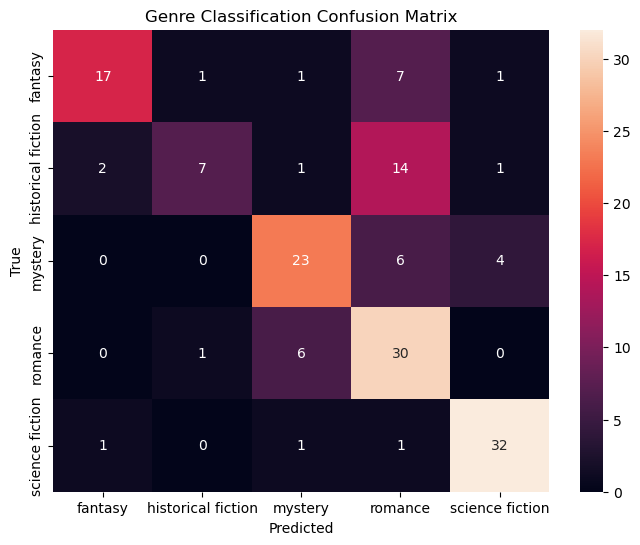

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Genre Classification Confusion Matrix')
plt.show()